In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon, Circle, Rectangle, RegularPolygon
import random
import cv2

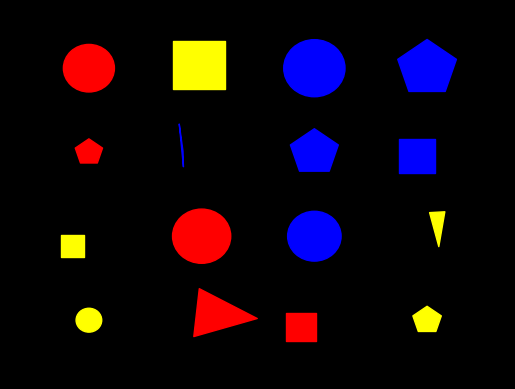

<Figure size 1400x1000 with 0 Axes>

In [2]:
# Создание фигуры и осей с черным фоном
fig, ax = plt.subplots(facecolor='black')

# Размеры экрана
screen_width = 1000
screen_height = 800

# Количество строк и столбцов для разделения экрана
rows = 4
cols = 4

# Размеры ячеек сетки
cell_width = screen_width / cols
cell_height = screen_height / rows

# Цвета
colors = ['red', 'blue', 'yellow']

# Отрисовка сетки
for i in range(rows+1):
    hline = ax.axhline(i * cell_height, color='white')  # Изменение цвета сетки на темно-серый
    hline.remove()
for j in range(cols+1):
    hline = ax.axvline(j * cell_width, color='white')   # Изменение цвета сетки на темно-серый
    hline.remove()

# Функция для создания случайного треугольника
def create_random_triangle(color):
    min_side_length = min(cell_width, cell_height) / 3  # Минимальная длина стороны треугольника
    vertices = np.random.rand(3, 2) * 0.7 + 0.15  # Случайные вершины в пределах (0.15, 0.85)
    vertices[0] *= [cell_width - min_side_length, cell_height - min_side_length]
    vertices[1] *= [cell_width - min_side_length, cell_height - min_side_length]
    vertices[2] *= [cell_width - min_side_length, cell_height - min_side_length]
    triangle = Polygon(vertices * 2, closed=True,color=color)  # Увеличение размера в 2 раза
    triangle.set_joinstyle('round')  # Скругляем углы
    return triangle

# Функция для создания случайного круга
def create_random_circle(color):
    radius = min(cell_width, cell_height) / 4 * random.uniform(0.5, 1.5)  # Радиус с учетом случайного масштаба
    center = [cell_width / 2, cell_height / 2]
    return Circle(center, radius,color=color)

# Функция для создания случайного квадрата
def create_random_square(color):
    side_length = min(cell_width, cell_height) / 2 * random.uniform(0.5, 1.5)  # Длина стороны с учетом случайного масштаба
    x = (cell_width - side_length) / 2
    y = (cell_height - side_length) / 2
    square = Rectangle((x, y), side_length, side_length,color=color)
    square.set_joinstyle('round')
    return square

# Функция для создания случайного пятиугольника
def create_random_pentagon(color):
    side_length = min(cell_width, cell_height) / 2 * random.uniform(0.5, 1.5)  # Длина стороны с учетом случайного масштаба
    x = (cell_width - side_length) / 2
    y = (cell_height - side_length) / 2
    pentagon = RegularPolygon((x + side_length / 2, y + side_length / 2), numVertices=5, radius=side_length / 2,color=color)
    pentagon.set_joinstyle('round')
    return pentagon

# Список функций создания фигур
shape_functions = [create_random_triangle, create_random_circle, create_random_square,create_random_pentagon]

shapes = []
#декартово произведение всех фигур и цветов
for i in range(len(colors)):
    for j in range(len(shape_functions)):
        shapes.append(shape_functions[j](colors[i]))

#добивка до 16 фигур случайными
for i in range(4):
    shapes.append(random.choice(shape_functions)(random.choice(colors)))

random.shuffle(shapes)

# Отрисовка случайных фигур в ячейках сетки
for i in range(rows):
    for j in range(cols):
        shape_center_x = (j + 0.5) * cell_width
        shape_center_y = (i + 0.5) * cell_height
        shape = shapes[j+i*cols]
        ax.add_patch(shape)
        if isinstance(shape, Polygon):
            shape.set_xy(shape.get_xy() + np.array([[shape_center_x - cell_width / 2, shape_center_y - cell_height / 2]]))
        elif isinstance(shape, Circle):
            shape.set_center((shape_center_x, shape_center_y))
        elif isinstance(shape, RegularPolygon):
            shape.xy = [shape_center_x, shape_center_y]
        else:
            shape.set_xy((shape_center_x - cell_width / 4, shape_center_y - cell_height / 4))

# Удаление осей
ax.axis('off')
# Показать график
plt.savefig('./fig.png')
plt.figure(figsize=(14, 10))
plt.show()



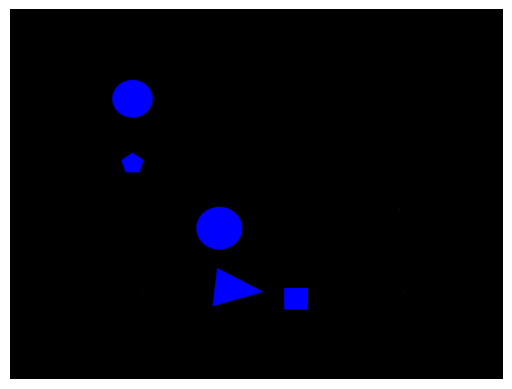

In [3]:

#11 вариант - синий пятиугольник
src = cv2.imread('./fig.png')
cv2.namedWindow('1', cv2.WINDOW_NORMAL)
cv2.resizeWindow('1', 1400, 1000)
# Выделяем красные объекты на изображении
blue_lower = np.array([0, 0, 50])
blue_higher = np.array([50, 50, 255])
mask = cv2.inRange(src, blue_lower, blue_higher)
selection = cv2.bitwise_and(src, src, mask=mask)

plt.axis('off')
plt.imshow(selection)
plt.show()

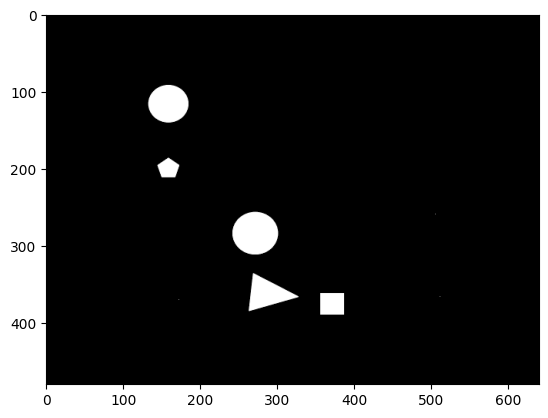

In [4]:
# Преобразуем в ЧБ
gray = cv2.cvtColor(selection, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')
plt.show()

1
1
4
3
1
8
6
8


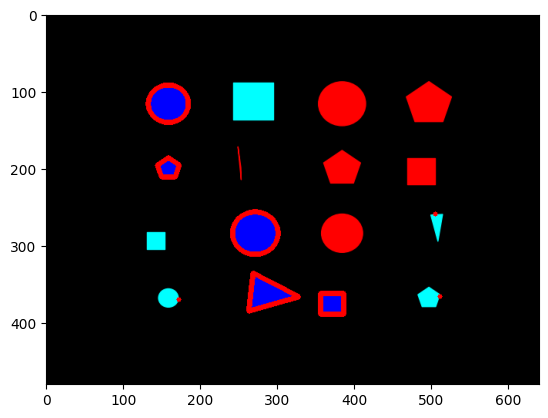

In [5]:
# Определение границ оператором Кэнни
canny = cv2.Canny(gray, 10, 250)
contours = cv2.findContours(gray.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
figures = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
for cont in contours:
    #поиск периметра и определение количества углов
    sm = cv2.arcLength(cont, True)
    apd = cv2.approxPolyDP(cont, 0.02*sm, True)
    # выделение контуров
    print(len(apd))
    if len(apd) == 5:
        cv2.drawContours(src, [cont], -1, (0,255,0), 5)
    else:
        cv2.drawContours(src, [cont], -1, (255,0,0), 5)
plt.imshow(src)
plt.show()